In [2]:
# Importando as bibliotecas

# pandas, numpy, matplotlib, seaborn
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
sns.set_style('whitegrid')
%matplotlib inline

In [3]:
# Vamos iniciar o notebook importanto o Dataset
titanic_df = pd.read_csv("../input/train.csv")
test_df    = pd.read_csv("../input/test.csv")

# Podemos observar as primeiras linhas dele.
titanic_df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


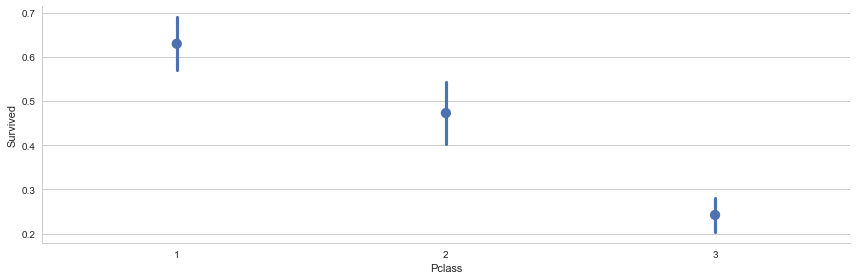

In [4]:
#Vamos começar a olhar nosso dados sem passar primeiramente por filtros.

#O primeiro campo disponível é Pclass, ou seja, qual a classe do passegeiro. Dados históricos 
# (ou nesse casoaté cinematográficos) nos levam a acreditar que pessoas com um ticket de primeira
# classe tiveram maior chance de sobreviver que pessoas com um ticket de terceira classe.

sns.factorplot('Pclass','Survived', data=titanic_df,size=4,aspect=3,linestyles=[" "]);

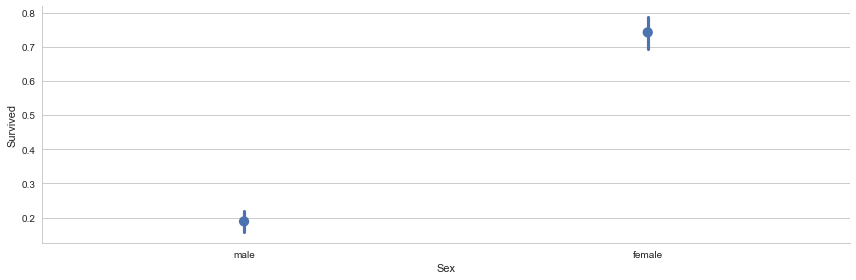

In [5]:
# O segundo campo disponível é o nome. Provavelmente o nome não influenciou a chance de 
# sobrevivência, além de ser uma variável um tanto complicada para se analisar. Podemo 
# passar para a próxima que é o Sexo do passageiro. Novamente motivos históricos nos 
#levam a acreditar que Mulheres tiveram mais probabilidade de sobrevivência.
sns.factorplot('Sex','Survived', data=titanic_df,size=4,aspect=3,linestyles=[" "]);

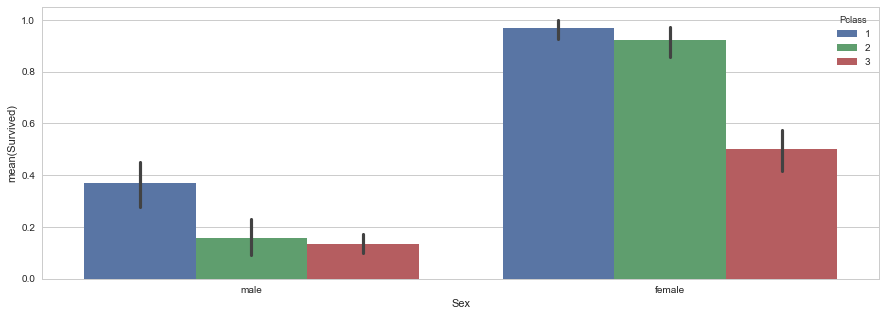

In [6]:
# Um modo interessante de se observar essas duas variáveis juntas pode ser visto no seguinte gráfico:
fig, axis1 = plt.subplots(1,figsize=(15,5))
sns.barplot(x='Sex', y='Survived', hue='Pclass', data=titanic_df);

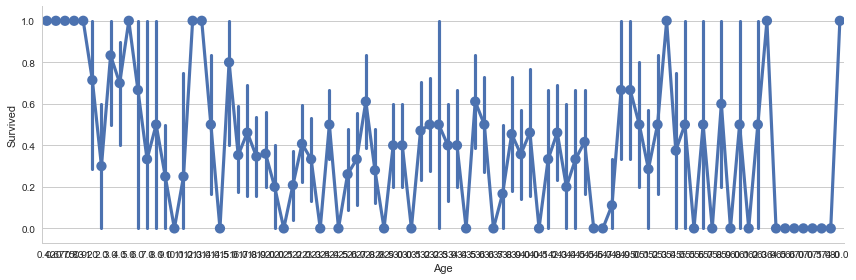

In [7]:
# Agora vamos analisar a idade..
sns.factorplot('Age','Survived', data=titanic_df,size=4,aspect=3);

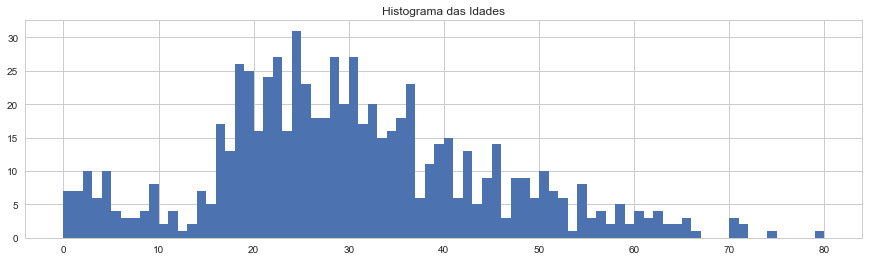

In [8]:
# Como você pode ver, analisar a chance de sobrevivência usando uma variável contínua 
# (nesse caso ela é discreta, mas com muitas classes) não funciona do mesmo modo que 
# observar as variáveis discretas acima. Vamos agrupar os passageiros  por idade e 
# criar um histograma. Leve em conta que existem mais pessoas com certas idades do que outras.
fig, axis1 = plt.subplots(1,figsize=(15,4))
axis1.set_title('Histograma das Idades')

titanic_df['Age'].dropna().astype(int).hist(bins=80, ax=axis1);

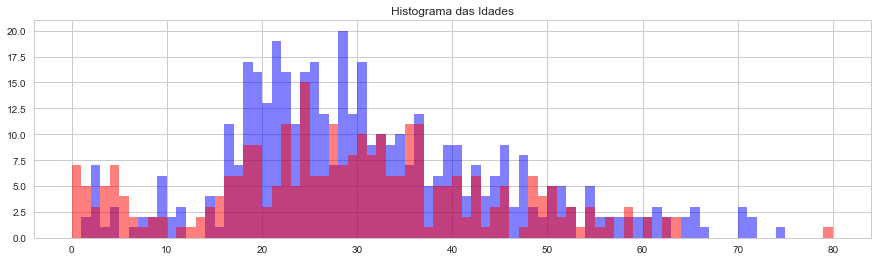

In [9]:
# Vamos tentar agora visualizar a sobrevivência em função da Idade.
fig, axis1 = plt.subplots(1,figsize=(15,4))
axis1.set_title('Histograma das Idades')
titanic_df[titanic_df['Survived']==0].Age.dropna().hist(bins=80, ax=axis1,stacked=True, range=(0,80), fc=(0, 0, 1, 0.5))
titanic_df[titanic_df['Survived']==1].Age.dropna().hist(bins=80, ax=axis1,stacked=True, range=(0,80), fc=(1, 0, 0, 0.5));

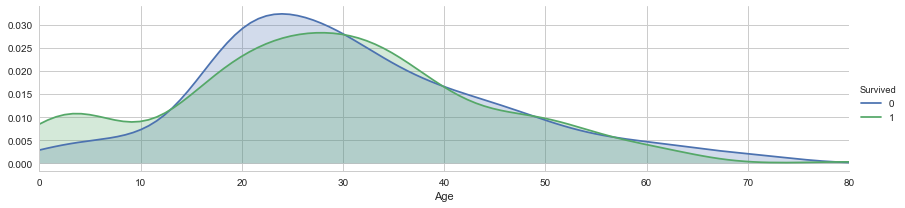

In [10]:
# Ou, de uma forma mais "Fancy", a probabilidade de sobrevivência pode ser vista como uma 
# curva contínua.
facet = sns.FacetGrid(titanic_df, hue="Survived",aspect=4)
facet.map(sns.kdeplot,'Age',shade= True)
facet.set(xlim=(0, titanic_df['Age'].max()))
facet.add_legend();

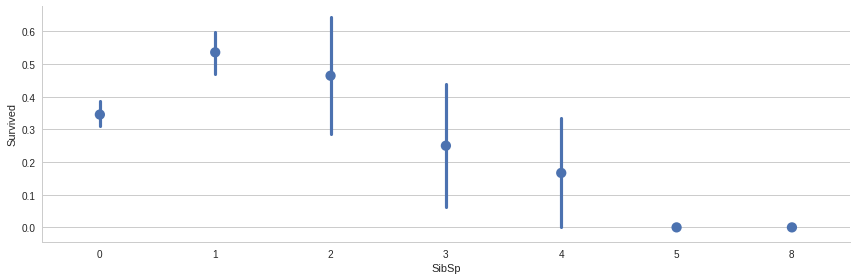

In [10]:
# Agora vamos analisar o próximo campo (SibSp): a existência e quantidade de irmãos e 
# esposa/marido a bordo do Titanic. Para essa variável, novamente o Dataset não é homogêneo, 
# ou seja, devemos investigar qual a quantidade típica de filhos a bordo.
sns.factorplot('SibSp','Survived', data=titanic_df,size=4,aspect=3,linestyles=[" "]);

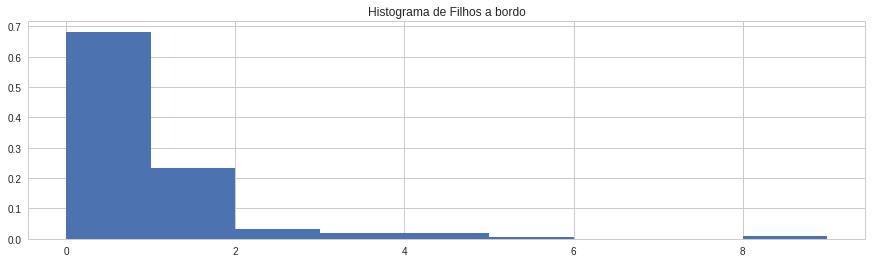

In [11]:
# Como esperado, essa não é uma variável homogênia: a maior parte das pessoas, quase 70%, 
# não possuiam irmãos e esposa/marido a bordo.
fig, axis1 = plt.subplots(1,figsize=(15,4))
axis1.set_title('Histograma de Filhos a bordo')

titanic_df['SibSp'].dropna().astype(int).hist(bins=9, range=(0,9), ax=axis1,normed=True);

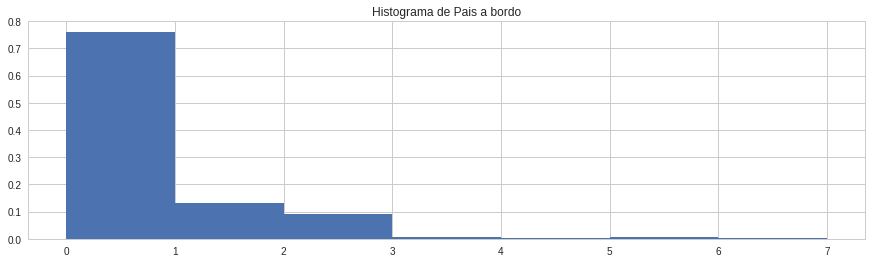

In [12]:
# A próxima variável que olharemos é a quantidade de Pais e crianças a bordo (Parch). 
# Novamente não é uma distribuição nada homogênea.
fig, axis1 = plt.subplots(1,figsize=(15,4))
axis1.set_title('Histograma de Pais a bordo')

titanic_df['Parch'].dropna().hist(bins=7,range=(0,7), ax=axis1, normed=True);

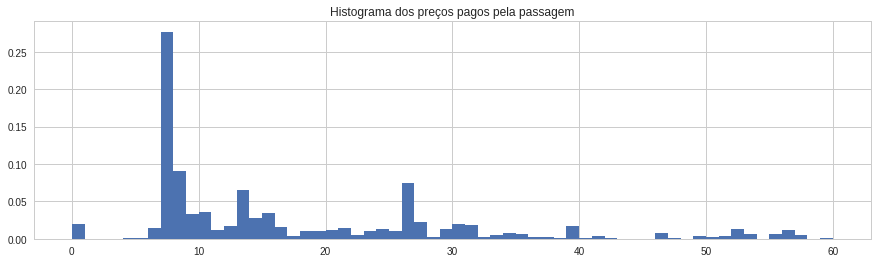

In [13]:
# A penúltima variável que olharemos é o valor pago pela passagem (Fare).
fig, axis1 = plt.subplots(1,figsize=(15,4))
axis1.set_title('Histograma dos preços pagos pela passagem')

titanic_df['Fare'].dropna().astype(int).hist(bins=60, range=(0,60), normed = True, ax=axis1);

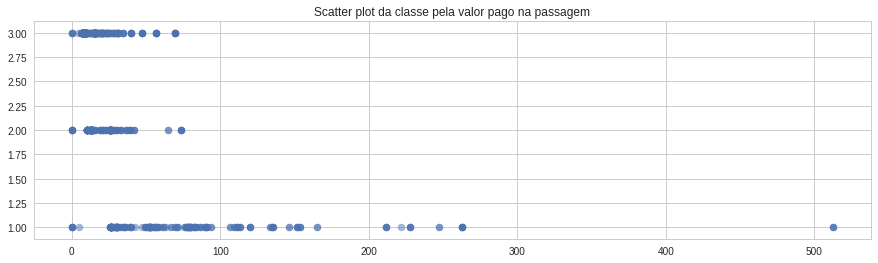

In [14]:
# Vamos dar uma olhada na distribuição de valores das passagens em relação a classe.
fig, axis1 = plt.subplots(1,figsize=(15,4))
axis1.set_title('Scatter plot da classe pela valor pago na passagem')
plt.scatter(titanic_df['Fare'], titanic_df['Pclass'], s=50, alpha=0.5)
plt.show()

Média = 84.1546875
Desvio = 78.198726116


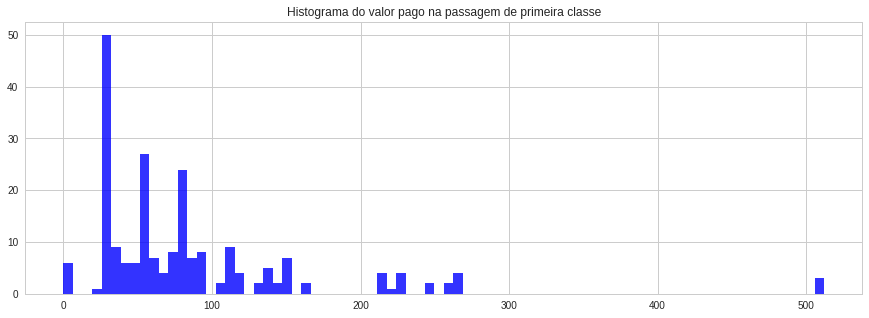

In [15]:
# Wow! Vamos ver idependentemente essa ditribuição em relação a cada classe e, usando o numpy, 
# vamos calcular a média e o desvio padrão.

# Primeiro a primeira classe
fig, axis1 = plt.subplots(1,figsize=(15,5))
axis1.set_title('Histograma do valor pago na passagem de primeira classe')
titanic_df[titanic_df['Pclass']==1].Fare.dropna().hist(bins=80, fc=(0, 0, 1, 0.8))
first_class = np.array(titanic_df[titanic_df['Pclass']==1].Fare.dropna())
print('Média = ' + str(first_class.mean()))
print('Desvio = ' + str(first_class.std()))

Média = 20.6621831522
Desvio = 13.3808887599


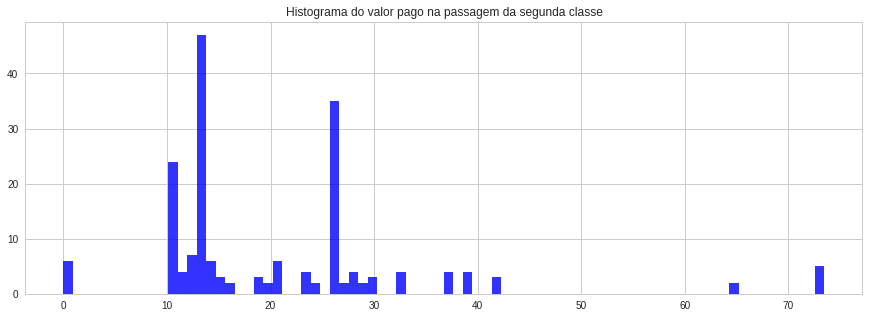

In [16]:
# Segunda classe
fig, axis1 = plt.subplots(1,figsize=(15,5))
axis1.set_title('Histograma do valor pago na passagem da segunda classe')
titanic_df[titanic_df['Pclass']==2].Fare.dropna().hist(bins=80, fc=(0, 0, 1, 0.8))
second_class = np.array(titanic_df[titanic_df['Pclass']==2].Fare.dropna())
print('Média = ' + str(second_class.mean()))
print('Desvio = ' + str(second_class.std()))

Média = 13.6755501018
Desvio = 11.7661415569


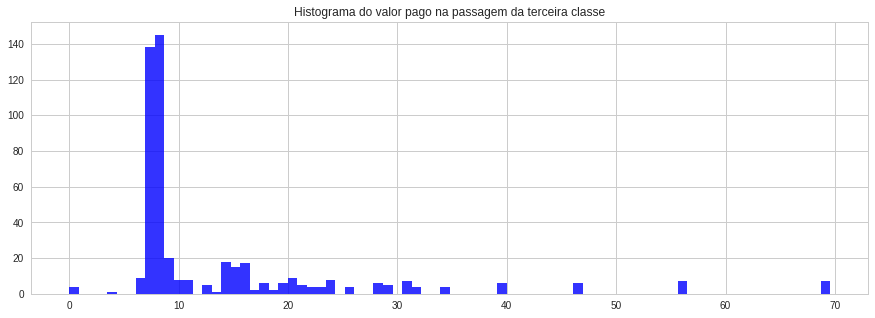

In [17]:
# Terceira classe
fig, axis1 = plt.subplots(1,figsize=(15,5))
axis1.set_title('Histograma do valor pago na passagem da terceira classe')
titanic_df[titanic_df['Pclass']==3].Fare.dropna().hist(bins=80, fc=(0, 0, 1, 0.8))
third_class = np.array(titanic_df[titanic_df['Pclass']==3].Fare.dropna())
print('Média = ' + str(third_class.mean()))
print('Desvio = ' + str(third_class.std()))

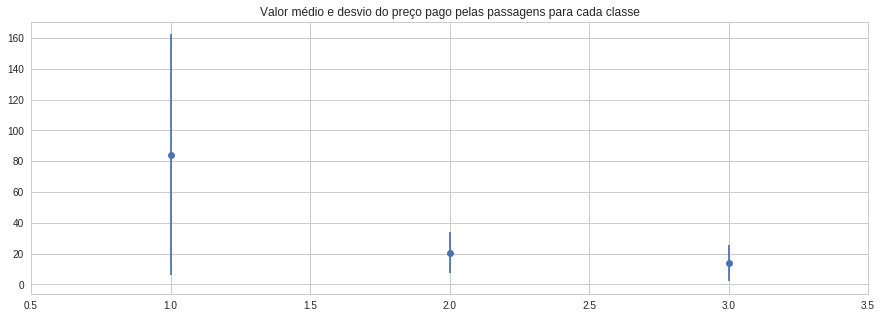

In [18]:
# Vamos agora ver os 3 valores de média e desvio em apenas um plot
mean_fare = []
mean_fare.append(first_class.mean())
mean_fare.append(second_class.mean())
mean_fare.append(third_class.mean())

std_fare = []
std_fare.append(first_class.std())
std_fare.append(second_class.std())
std_fare.append(third_class.std())

titan_class = [1,2,3]
fig, axis1 = plt.subplots(1,figsize=(15,5))
axis1.set_title('Valor médio e desvio do preço pago pelas passagens para cada classe')
axis1.axis(xmin=0.5,xmax=3.5)
plt.errorbar(titan_class, mean_fare, std_fare, linestyle='None', marker='o')
plt.show()

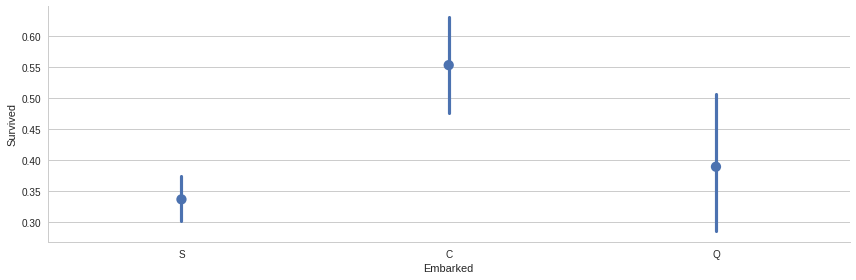

In [19]:
# A última variável que vamos investigar é o porto de embarque do passageiro. A notação usada 
# nessa variável é: C = Cherbourg, Q = Queenstown, S = Southampton
sns.factorplot('Embarked','Survived', data=titanic_df,size=4,aspect=3,linestyles=[" "]);

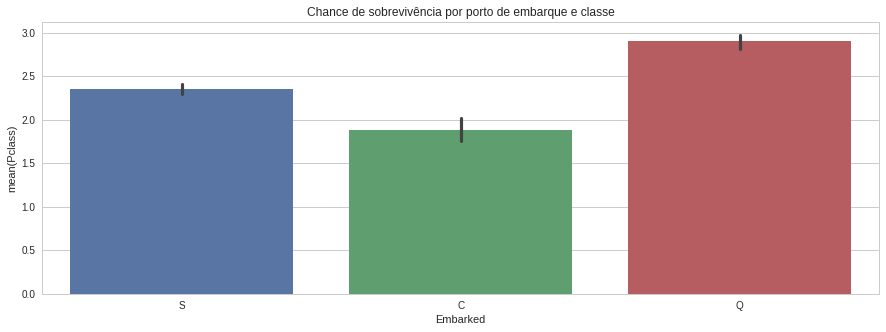

In [20]:
# Pelos dados acima, parece que passageiros que embarcaram em Cherbourg tiveram uma maior chance 
# de sobrevivência. Vamos checar a classe dos embarques em cada porto:
fig, axis1 = plt.subplots(1,figsize=(15,5))
axis1.set_title('Chance de sobrevivência por porto de embarque e classe')
sns.barplot(x='Embarked', y='Pclass', data=titanic_df);

In [21]:
# Uma pergunta muito importante é quantos dados nós temos em cada campo. Como na maioria dos 
# datasets, não temos todos os dados de todos os passageiros.
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


In [22]:
# Nós já sabemos que a classe e o sexo sem dúvida influenciam na probabilidade de sobrevivência. 
# Agora é hora de criar nosso primeiro modelo.

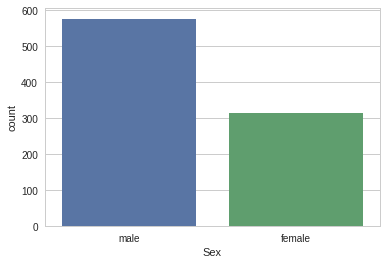

In [8]:
sns.countplot(data=titanic_df, x='Sex');